In [ ]:
!pip install etna

In [177]:
import pandas as pd
from etna.datasets import TSDataset

In [47]:
# Read the data
pd_df = pd.read_csv("data.csv", index_col=0)

In [48]:
pd_df

,day,item_number,item_name,purchase_price,suggested_retail_price,orders_quantity,sales_quantity,revenue
0,2022-02-09,80317483,ROMA TOMATEN ES I 500G SF,0.920000,1.490000,0.0,16.0,23.55
1,2022-02-09,80317483,ROMA TOMATEN ES I 500G SF,0.920000,1.490000,0.0,16.0,23.55
2,2022-02-09,80101923,SL MANDARINEN BEH.ES I 750G GS,2.050000,3.490000,0.0,3.0,10.47
3,2022-02-09,80101923,SL MANDARINEN BEH.ES I 750G GS,2.050000,3.490000,0.0,3.0,10.47
4,2022-02-09,80028349,UH ZWIEBELN DE-HE I 1KG GS,0.640000,0.990000,0.0,13.0,12.84
...,...,...,...,...,...,...,...,...
1873,2021-04-03,80317483,ROMA TOMATEN ES I 500G SF,0.978451,1.546338,40.0,17.0,25.33
1874,2021-04-03,80101923,SL MANDARINEN BEH.ES I 750G GS,1.991321,3.216415,0.0,2.0,5.98
1875,2021-04-03,80101923,SL MANDARINEN BEH.ES I 750G GS,1.991321,3.216415,0.0,2.0,5.98
1876,2021-04-03,80028349,UH ZWIEBELN DE-HE I 1KG GS,0.674928,1.055314,0.0,23.0,22.77


In [49]:
# In real settings it's reasonable to check data one more time and maybe talk to business if from tech perspective everything is fine
pd_df = pd_df.drop_duplicates()

In [50]:
pd_df

,day,item_number,item_name,purchase_price,suggested_retail_price,orders_quantity,sales_quantity,revenue
0,2022-02-09,80317483,ROMA TOMATEN ES I 500G SF,0.920000,1.490000,0.0,16.0,23.55
2,2022-02-09,80101923,SL MANDARINEN BEH.ES I 750G GS,2.050000,3.490000,0.0,3.0,10.47
4,2022-02-09,80028349,UH ZWIEBELN DE-HE I 1KG GS,0.640000,0.990000,0.0,13.0,12.84
6,2022-02-08,80317483,ROMA TOMATEN ES I 500G SF,0.920000,1.490000,10.0,14.0,20.71
8,2022-02-08,80101923,SL MANDARINEN BEH.ES I 750G GS,2.050000,3.490000,0.0,3.0,9.89
...,...,...,...,...,...,...,...,...
1868,2021-04-04,80101923,SL MANDARINEN BEH.ES I 750G GS,1.991321,3.216415,0.0,0.0,NaN
1870,2021-04-04,80028349,UH ZWIEBELN DE-HE I 1KG GS,0.674928,1.055314,0.0,0.0,NaN
1872,2021-04-03,80317483,ROMA TOMATEN ES I 500G SF,0.978451,1.546338,40.0,17.0,25.33
1874,2021-04-03,80101923,SL MANDARINEN BEH.ES I 750G GS,1.991321,3.216415,0.0,2.0,5.98


In [117]:
pd_df.day

0       2022-02-09
2       2022-02-09
4       2022-02-09
6       2022-02-08
8       2022-02-08
           ...    
1868    2021-04-04
1870    2021-04-04
1872    2021-04-03
1874    2021-04-03
1876    2021-04-03
Name: day, Length: 939, dtype: object

In [51]:
pd_df.item_number.value_counts()

80317483    313
80101923    313
80028349    313
Name: item_number, dtype: int64

In [52]:
pd_df.item_name.value_counts()

ROMA TOMATEN ES I 500G SF         313
SL MANDARINEN BEH.ES I 750G GS    313
UH ZWIEBELN DE-HE I 1KG GS        313
Name: item_name, dtype: int64

In [57]:
pd_df.groupby('item_number')['day'].max()

item_number
80028349    2022-02-09
80101923    2022-02-09
80317483    2022-02-09
Name: day, dtype: object

In [178]:
original_df = pd_df.copy()

original_df["timestamp"] = pd.to_datetime(original_df["day"])
original_df["target"] = original_df["sales_quantity"]
original_df["segment"] = original_df["item_number"]
original_df.drop(columns=["day", "sales_quantity", "item_number", 'item_name'], inplace=True)
original_df = original_df.reset_index(drop=True)
original_df.head()

,purchase_price,suggested_retail_price,orders_quantity,revenue,timestamp,target,segment
0,0.92,1.49,0.0,23.55,2022-02-09,16.0,80317483
1,2.05,3.49,0.0,10.47,2022-02-09,3.0,80101923
2,0.64,0.99,0.0,12.84,2022-02-09,13.0,80028349
3,0.92,1.49,10.0,20.71,2022-02-08,14.0,80317483
4,2.05,3.49,0.0,9.89,2022-02-08,3.0,80101923


# Creating TSDataset

In [198]:
from etna.datasets.tsdataset import TSDataset

df = TSDataset.to_dataset(original_df)
df.head()

segment           80028349                                                \
feature    orders_quantity purchase_price revenue suggested_retail_price   
timestamp                                                                  
2021-04-03             0.0       0.674928   22.77               1.055314   
2021-04-04             0.0       0.674928     NaN               1.055314   
2021-04-05             0.0       0.674928     NaN               1.055314   
2021-04-06             0.0       0.610000   20.54               0.790000   
2021-04-07             0.0       0.610000   15.01               0.790000   

segment                  80101923                         \
feature    target orders_quantity purchase_price revenue   
timestamp                                                  
2021-04-03   23.0             0.0       1.991321    5.98   
2021-04-04    0.0             0.0       1.991321     NaN   
2021-04-05    0.0             0.0       1.991321     NaN   
2021-04-06   26.0             0.0       1.920000    2.99   
2021-04-07   19.0             0.0       1.920000     NaN   

segment                                         80317483                 \
feature    suggested_retail_price target orders_quantity purchase_price   
timestamp                                                                 
2021-04-03               3.216415    2.0            40.0       0.978451   
2021-04-04               3.216415    0.0             0.0       0.978451   
2021-04-05               3.216415    0.0             0.0       0.978451   
2021-04-06               2.990000    1.0             0.0       0.990000   
2021-04-07               2.990000    0.0            10.0       0.990000   

segment                                           
feature    revenue suggested_retail_price target  
timestamp                                         
2021-04-03   25.33               1.546338   17.0  
2021-04-04     NaN               1.546338    0.0  
2021-04-05     NaN               1.546338    0.0  
2021-04-06   26.82               1.490000   18.0  
2021-04-07    7.45               1.490000    5.0

In [199]:
ts = TSDataset(df, freq="D")
ts.info()

<class 'etna.datasets.TSDataset'>
num_segments: 3
num_exogs: 4
num_regressors: 0
num_known_future: 0
freq: D
         start_timestamp end_timestamp  length  num_missing
segments                                                   
80028349      2021-04-03    2022-02-09     313            0
80101923      2021-04-03    2022-02-09     313            0
80317483      2021-04-03    2022-02-09     313            0


In [200]:
ts.describe()

,start_timestamp,end_timestamp,length,num_missing,num_segments,num_exogs,num_regressors,num_known_future,freq
segments,,,,,,,,,
80028349,2021-04-03,2022-02-09,313,0,3,4,0,0,D
80101923,2021-04-03,2022-02-09,313,0,3,4,0,0,D
80317483,2021-04-03,2022-02-09,313,0,3,4,0,0,D


# Plotting

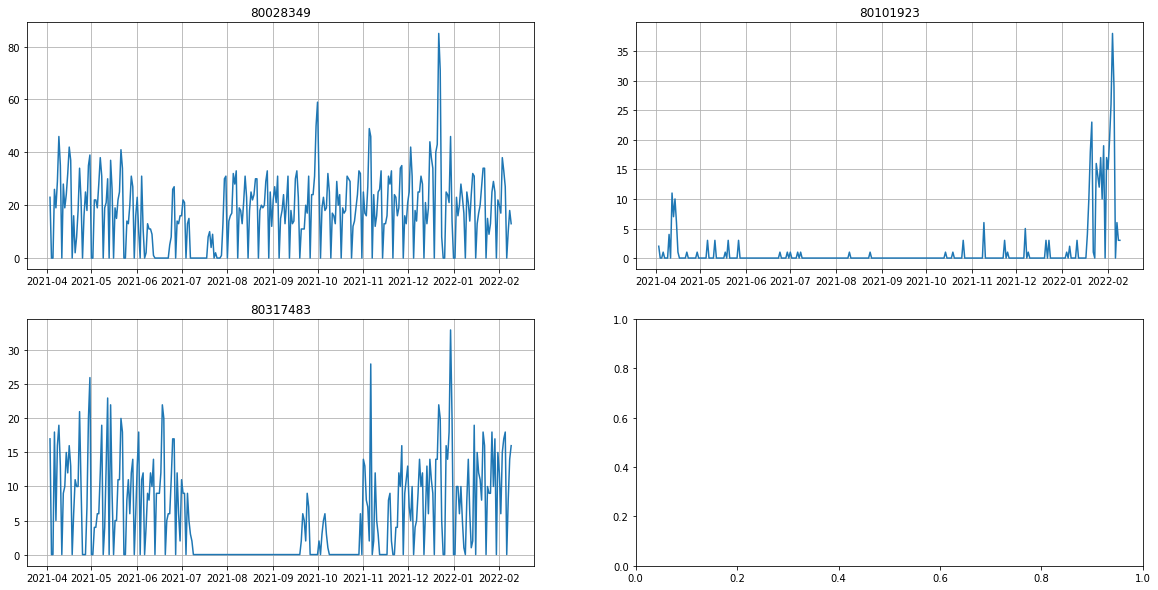

In [64]:
ts.plot()

In [128]:
original_df['dayofweek'] = original_df.timestamp.dt.dayofweek
original_df.groupby('dayofweek')['target'].max()

dayofweek
0    40.0
1    43.0
2    85.0
3    71.0
4    59.0
5    46.0
6     0.0
Name: target, dtype: float64

In [131]:
original_df.groupby('dayofweek')['target'].mean()

dayofweek
0     7.222222
1     8.000000
2     8.237037
3    10.848485
4    12.530303
5    10.962963
6     0.000000
Name: target, dtype: float64

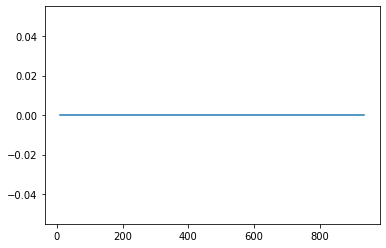

In [136]:
original_df[original_df['dayofweek']==6]['target'].plot()

It means that for Sunday we can safely predict 0 based on the data. It might be caused by the local tradition to rest on Sunday, may be shops are closed and so on.

In [130]:
original_df[original_df.dayofweek==6]

,purchase_price,suggested_retail_price,orders_quantity,revenue,timestamp,target,segment,dayofweek
9,0.978451,1.546338,0.0,NaN,2022-02-06,0.0,80317483,6
10,1.991321,3.216415,0.0,NaN,2022-02-06,0.0,80101923,6
11,0.674928,1.055314,0.0,NaN,2022-02-06,0.0,80028349,6
30,0.978451,1.546338,0.0,NaN,2022-01-30,0.0,80317483,6
31,1.991321,3.216415,0.0,NaN,2022-01-30,0.0,80101923,6
...,...,...,...,...,...,...,...,...
913,1.991321,3.216415,0.0,NaN,2021-04-11,0.0,80101923,6
914,0.674928,1.055314,0.0,NaN,2021-04-11,0.0,80028349,6
933,0.978451,1.546338,0.0,NaN,2021-04-04,0.0,80317483,6
934,1.991321,3.216415,0.0,NaN,2021-04-04,0.0,80101923,6


Let's take a look at other days

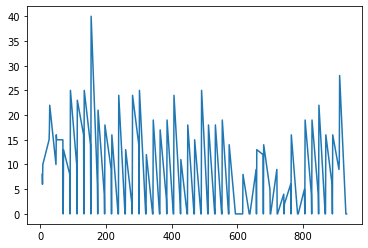

In [143]:
original_df[original_df['dayofweek']==0]['target'].plot();

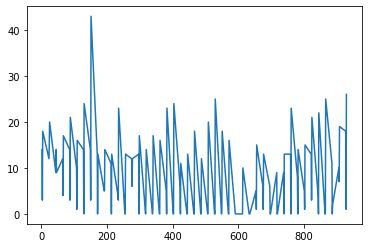

In [144]:
original_df[original_df['dayofweek']==1]['target'].plot();

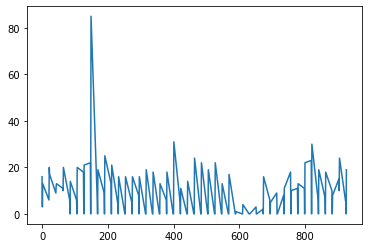

In [145]:
original_df[original_df['dayofweek']==2]['target'].plot();

Outlier

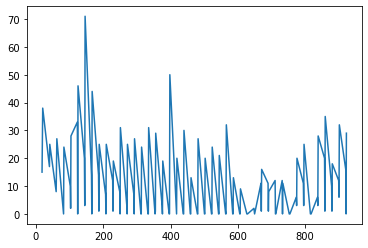

In [146]:
original_df[original_df['dayofweek']==3]['target'].plot();

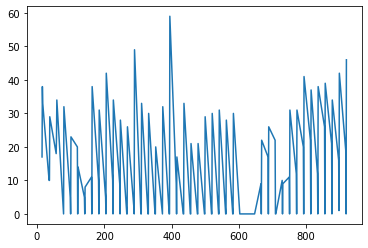

In [147]:
original_df[original_df['dayofweek']==4]['target'].plot();

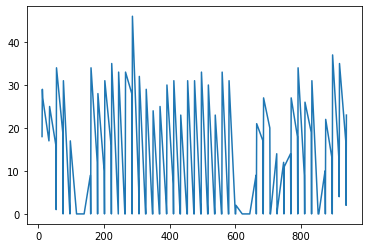

In [148]:
original_df[original_df['dayofweek']==5]['target'].plot();

# Forecasting single time series

Let's imagine that we want to **predict revenue for each item_number for the next day.**

In [66]:
pd_df.groupby('item_number')['day'].min()

item_number
80028349    2021-04-03
80101923    2021-04-03
80317483    2021-04-03
Name: day, dtype: object

In [65]:
pd_df.groupby('item_number')['day'].max()

item_number
80028349    2022-02-09
80101923    2022-02-09
80317483    2022-02-09
Name: day, dtype: object

## Simple forecast

Let's predict the daily values in  in our dataset using the NaiveModel

In [101]:
HORIZON = 14

train_ts, test_ts = ts.train_test_split(test_size=HORIZON)

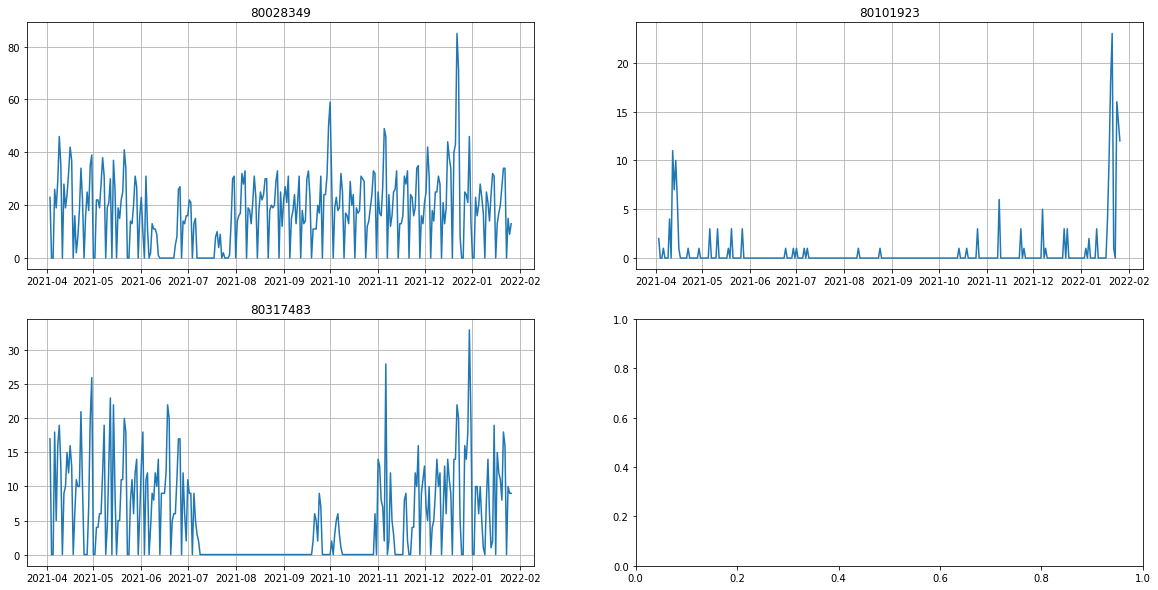

In [102]:
train_ts.plot()

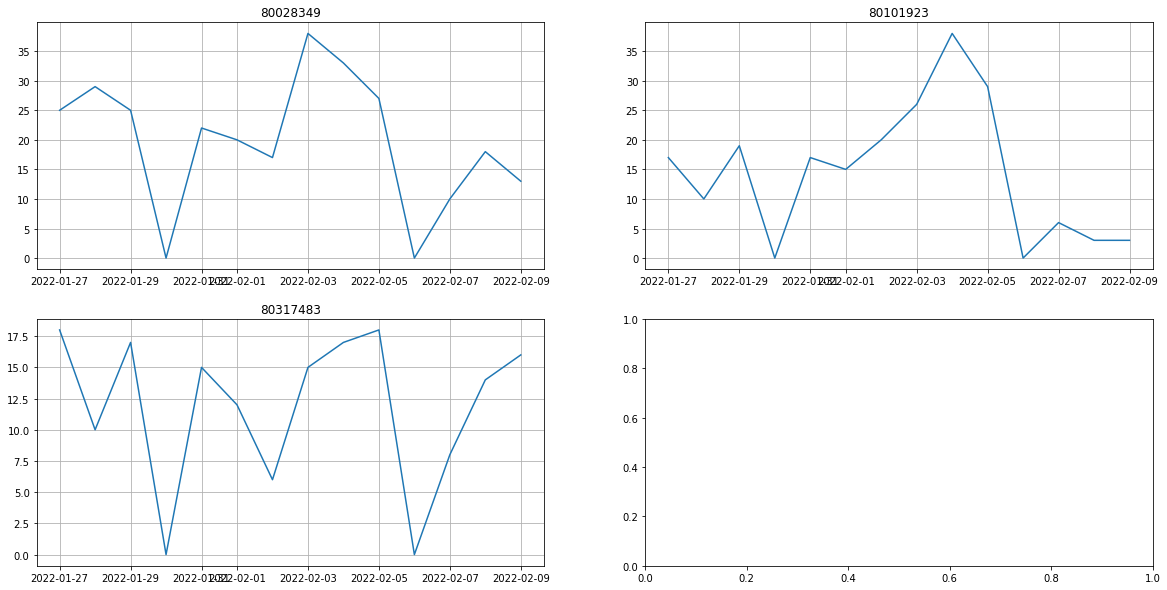

In [103]:
test_ts.plot()

In [85]:
from etna.models import NaiveModel

# Fit the model
model = NaiveModel(lag=7)
model.fit(train_ts)

/usr/local/lib/python3.8/dist-packages/etna/models/seasonal_ma.py:58: UserWarning: _SeasonalMovingAverageModel does not work with any exogenous series or features. It uses only target series for predict/
 
  warnings.warn(


NaiveModel(lag = 7, )

In [86]:
# Make the forecast
HORIZON_TO_PREDICT = 14

future_ts = train_ts.make_future(future_steps=HORIZON_TO_PREDICT, tail_steps=model.context_size)
forecast_ts = model.forecast(future_ts, prediction_size=HORIZON_TO_PREDICT)

In [233]:
forecast_ts.to_pandas().to_csv('forecast.csv', header=True)

In [87]:
from etna.metrics import SMAPE

smape = SMAPE()
smape(y_true=test_ts, y_pred=forecast_ts)

{'80028349': 25.77779188738813,
 '80317483': 32.053357757413295,
 '80101923': 67.14220062864553}

In [226]:
type(smape(y_true=test_ts, y_pred=forecast_ts))

dict

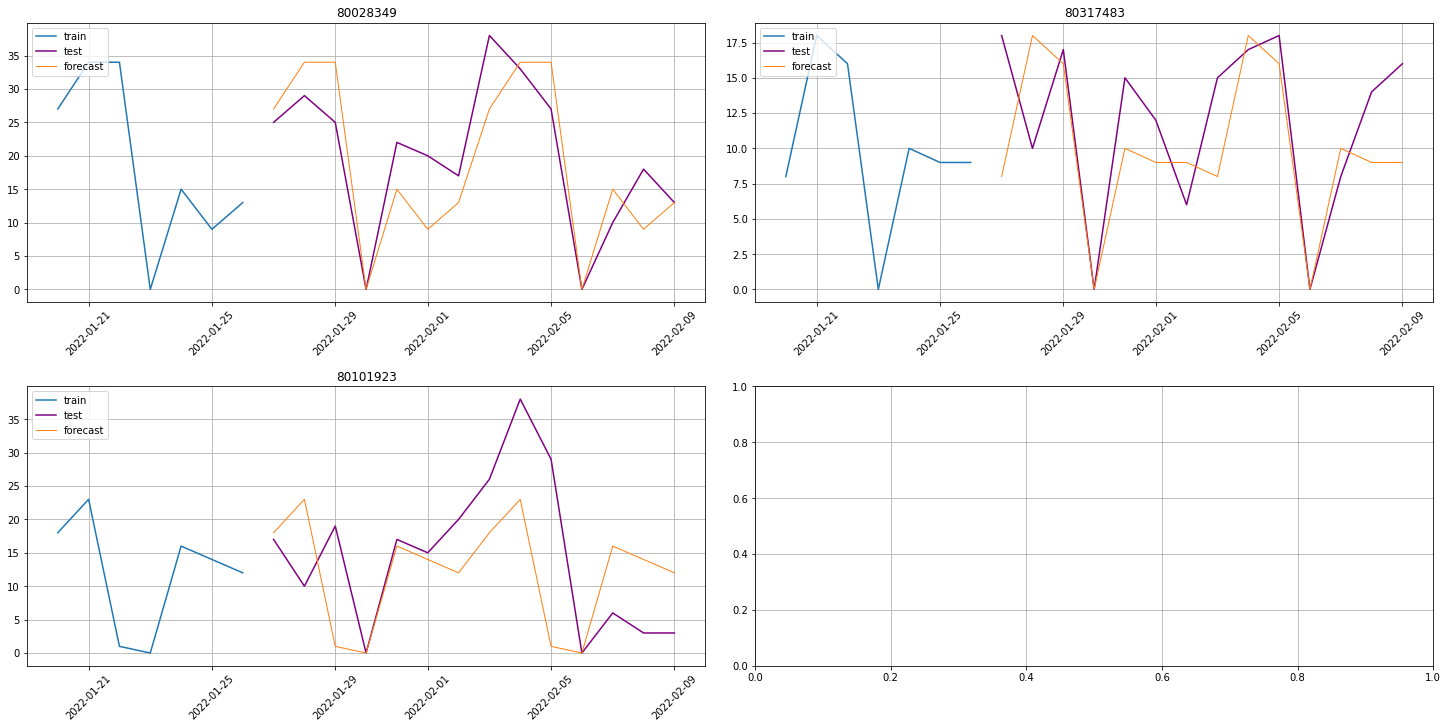

In [88]:
from etna.analysis import plot_forecast
plot_forecast(forecast_ts, test_ts, train_ts, n_train_samples=7)

## Prophet

In [89]:
from etna.models import ProphetModel

# Fit the model
model = ProphetModel()
model.fit(train_ts)

# Make the forecast
future_ts = train_ts.make_future(HORIZON_TO_PREDICT)
forecast_ts = model.forecast(future_ts)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbc3y0okf/0y7g0ouk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbc3y0okf/oshl7dqe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2556', 'data', 'file=/tmp/tmpbc3y0okf/0y7g0ouk.json', 'init=/tmp/tmpbc3y0okf/oshl7dqe.json', 'output', 'file=/tmp/tmpbc3y0okf/prophet_modeliogqc7yu/prophet_model-20230119151307.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:13:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:13:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality.

In [90]:
smape(y_true=test_ts, y_pred=forecast_ts)

{'80028349': 48.64082148005011,
 '80317483': 63.09956960669896,
 '80101923': 102.13866776980427}

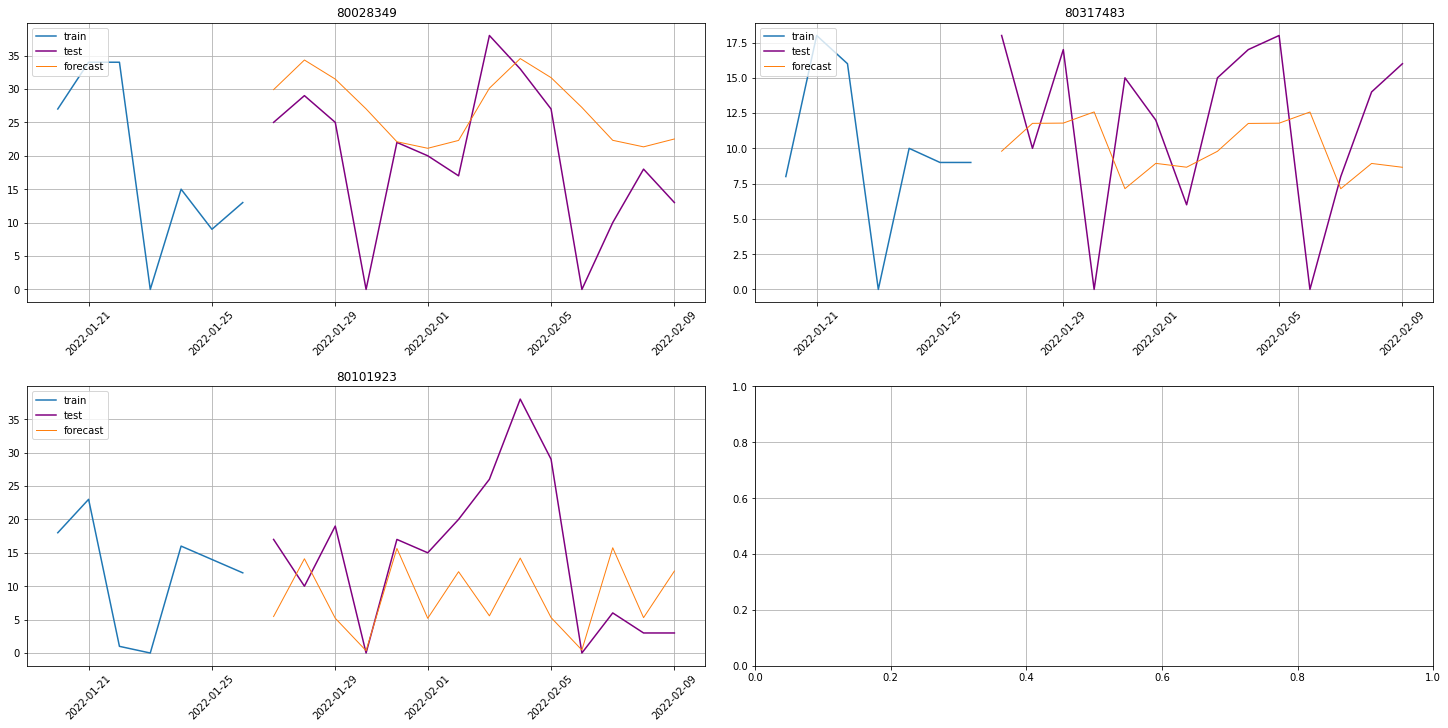

In [91]:
plot_forecast(forecast_ts, test_ts, train_ts, n_train_samples=7)

## Catboost

And finally let's try the Catboost model.

In [104]:
from etna.transforms import LagTransform

lags = LagTransform(in_column="target", lags=list(range(1, 7, 1)))
train_ts.fit_transform([lags])

In [105]:
from etna.models import CatBoostMultiSegmentModel

model = CatBoostMultiSegmentModel()
model.fit(train_ts)
future_ts = train_ts.make_future(HORIZON_TO_PREDICT)
forecast_ts = model.forecast(future_ts)

In [106]:
from etna.metrics import SMAPE

smape = SMAPE()
smape(y_true=test_ts, y_pred=forecast_ts)

{'80028349': 77.39997946409626,
 '80317483': 53.43316475479377,
 '80101923': 82.49190670147081}

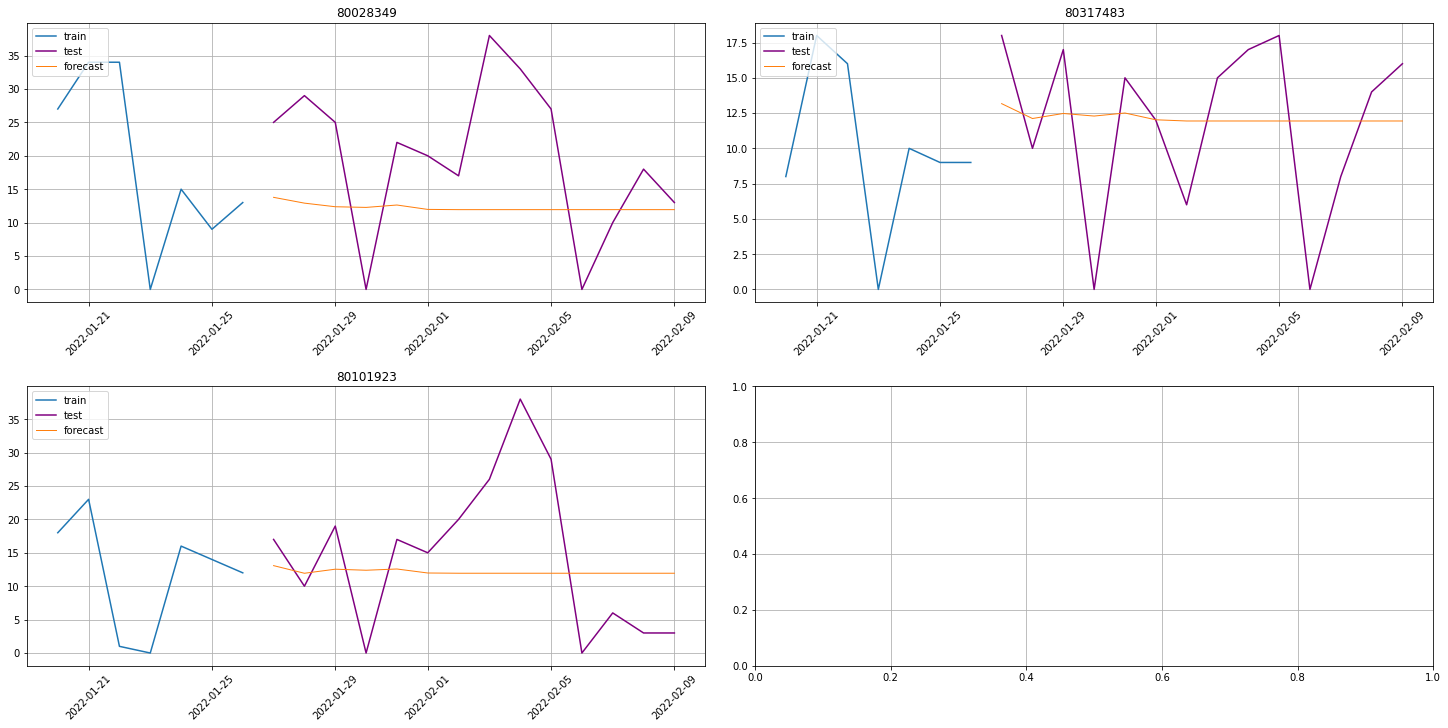

In [107]:
from etna.analysis import plot_forecast

train_ts.inverse_transform()
plot_forecast(forecast_ts, test_ts, train_ts, n_train_samples=7)

# Forecasting multiple time series

In [108]:
ts.info()

<class 'etna.datasets.TSDataset'>
num_segments: 3
num_exogs: 4
num_regressors: 0
num_known_future: 0
freq: D
         start_timestamp end_timestamp  length  num_missing
segments                                                   
80028349      2021-04-03    2022-02-09     313            0
80101923      2021-04-03    2022-02-09     313            0
80317483      2021-04-03    2022-02-09     313            0


### Feature creation

There are a lot of different features that might be created and I would certainly try experimenting with that if I have some additional time.

In [149]:
from etna.transforms import (
    MeanTransform,
    LagTransform,
    LogTransform,
    SegmentEncoderTransform,
    DateFlagsTransform,
    LinearTrendTransform,
)

log = LogTransform(in_column="target")
trend = LinearTrendTransform(in_column="target")
seg = SegmentEncoderTransform()

lags = LagTransform(in_column="target", lags=list(range(14, 96, 1)))
d_flags = DateFlagsTransform(
    day_number_in_week=True,
    special_days_in_week=[6],
)
mean14 = MeanTransform(in_column="target", window=14)

In [150]:
HORIZON = 14

train_ts, test_ts = ts.train_test_split(test_size=HORIZON)
train_ts.fit_transform([log, trend, lags, d_flags, seg, mean14])

In [151]:
test_ts.info()

<class 'etna.datasets.TSDataset'>
num_segments: 3
num_exogs: 4
num_regressors: 0
num_known_future: 0
freq: D
         start_timestamp end_timestamp  length  num_missing
segments                                                   
80028349      2022-01-27    2022-02-09      14            0
80101923      2022-01-27    2022-02-09      14            0
80317483      2022-01-27    2022-02-09      14            0


In [152]:
from etna.models.catboost import CatBoostMultiSegmentModel

model = CatBoostMultiSegmentModel()
model.fit(train_ts)
future_ts = train_ts.make_future(HORIZON)
forecast_ts = model.forecast(future_ts)

In [153]:
smape = SMAPE()
smape(y_true=test_ts, y_pred=forecast_ts)

{'80028349': 71.91506398172258,
 '80317483': 136.53197006746169,
 '80101923': 174.57398608879708}

In [114]:
smape = SMAPE()
smape(y_true=test_ts, y_pred=forecast_ts)

{'80028349': 78.5929523745345,
 '80317483': 134.1032173816332,
 '80101923': 173.99608373650082}

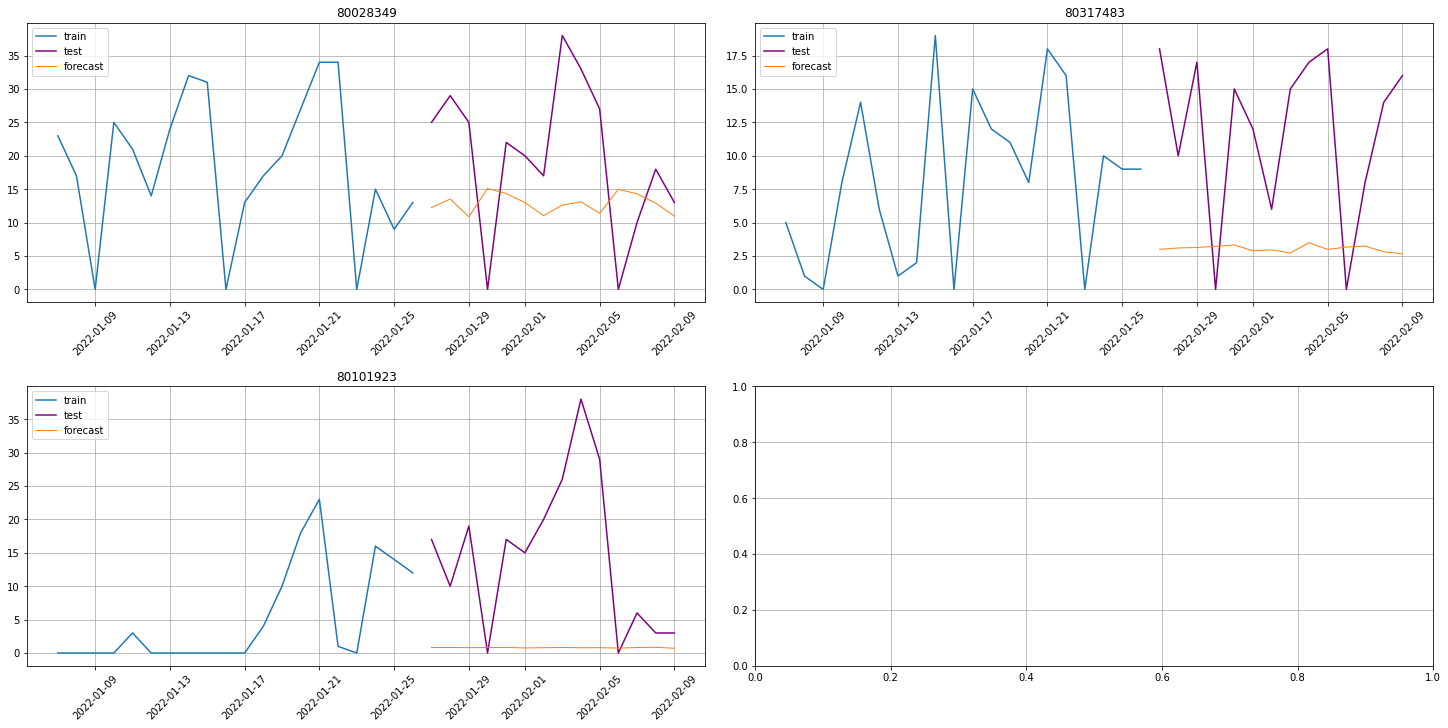

In [115]:
train_ts.inverse_transform()
plot_forecast(forecast_ts, test_ts, train_ts, n_train_samples=14)

# Outliers

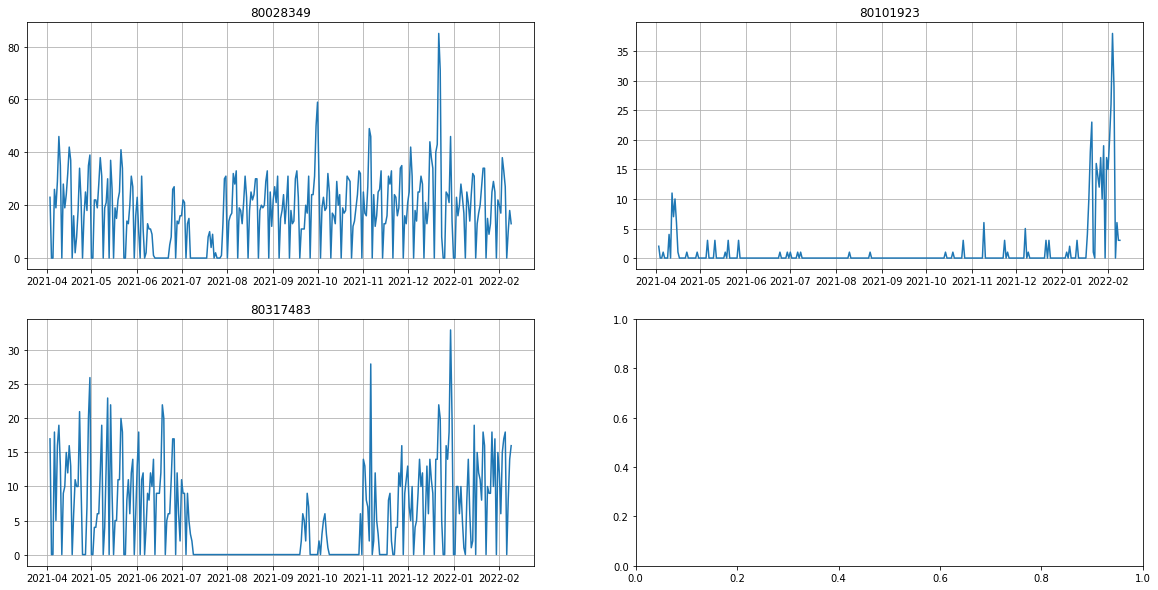

In [155]:
ts.plot()

In [157]:
from etna.analysis.outliers import (
    get_anomalies_median,
    get_anomalies_density,
    get_anomalies_prediction_interval,
    get_anomalies_hist,
)
from etna.analysis import plot_anomalies

## Median method

To obtain the point outliers using the median method we need to specify the window for fitting the median model.

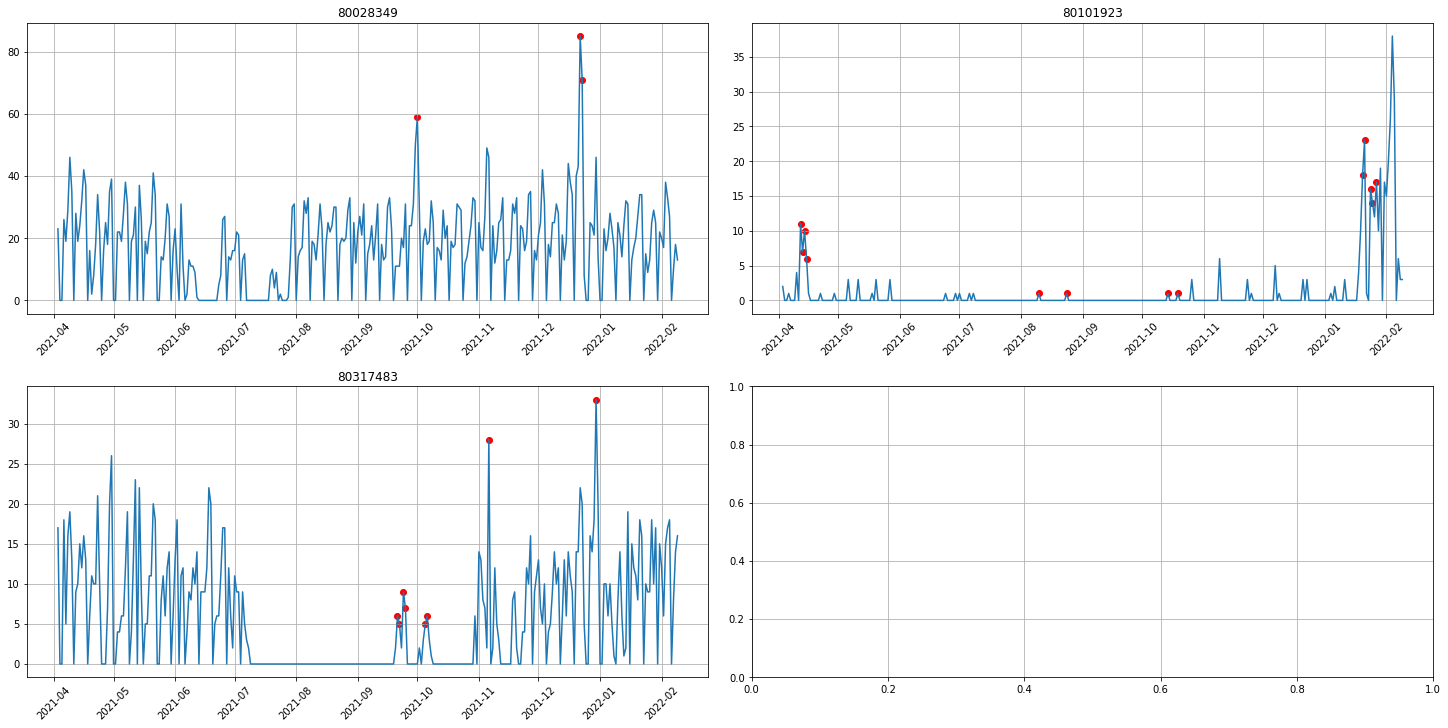

In [161]:
anomaly_dict = get_anomalies_median(ts, window_size=100)
plot_anomalies(ts, anomaly_dict)

## Density method

It is a distance-based method for outliers detection.

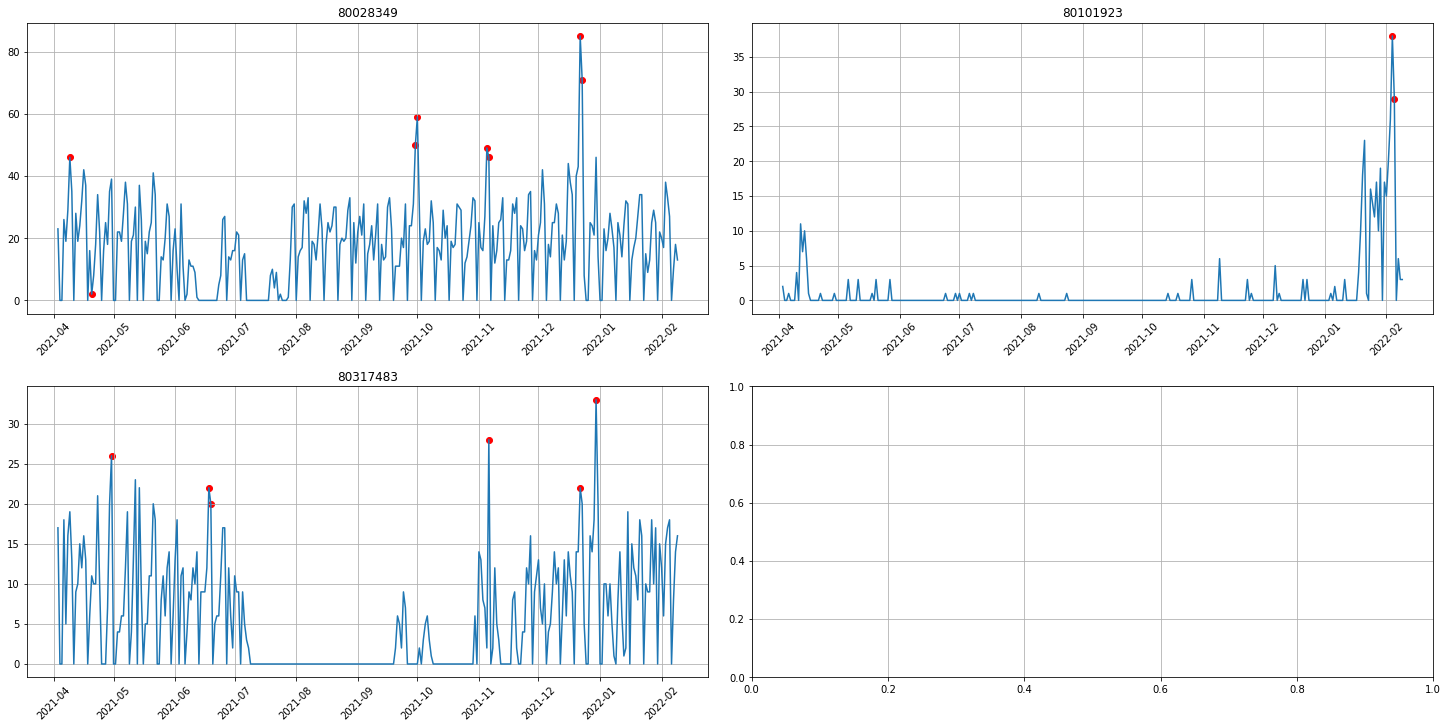

In [159]:
anomaly_dict = get_anomalies_density(ts, window_size=18, distance_coef=1, n_neighbors=4)
plot_anomalies(ts, anomaly_dict)

## Prediction interval method

It is a model-based method for outliers detection. Outliers here are all points out of the prediction interval predicted with the model.

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbc3y0okf/a9rqdf2m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbc3y0okf/nhuy3pil.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98554', 'data', 'file=/tmp/tmpbc3y0okf/a9rqdf2m.json', 'init=/tmp/tmpbc3y0okf/nhuy3pil.json', 'output', 'file=/tmp/tmpbc3y0okf/prophet_modelqrrp0any/prophet_model-20230119160544.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:05:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:05:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality

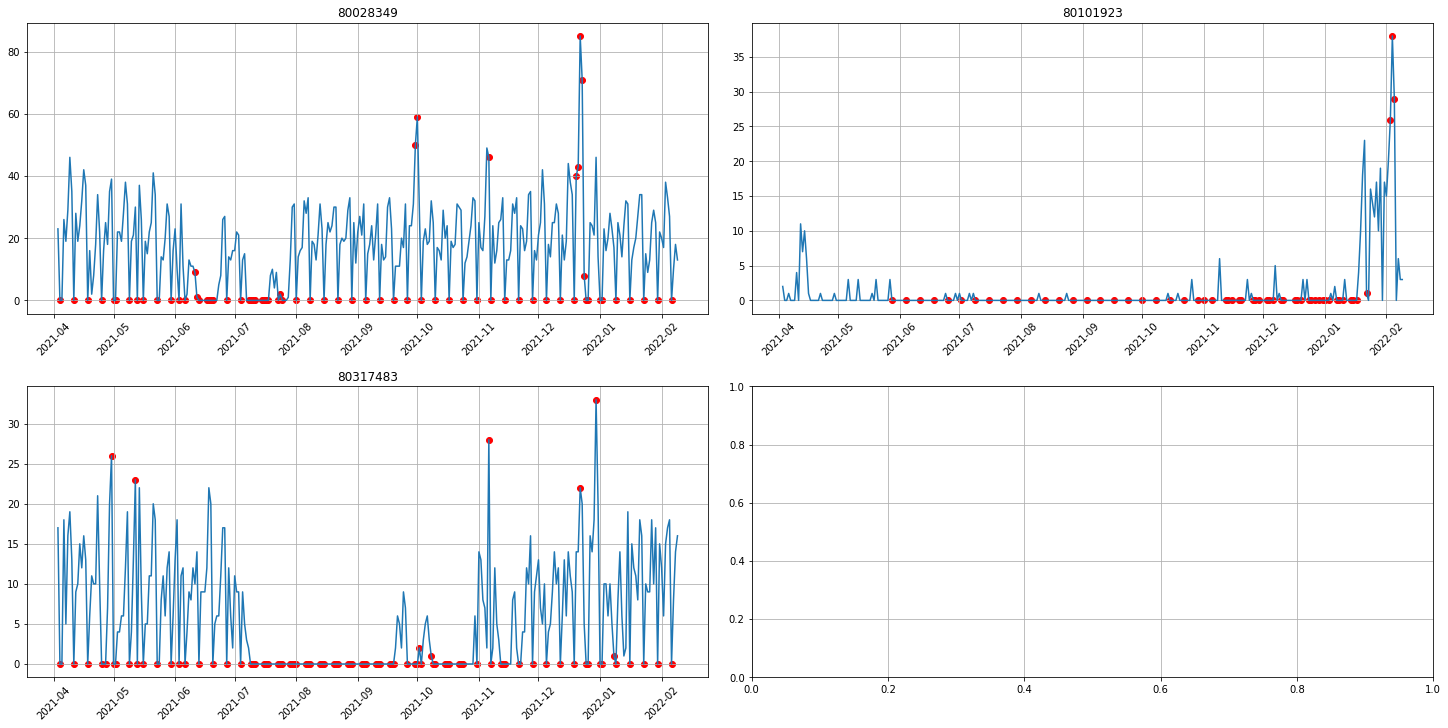

In [163]:
from etna.models import ProphetModel

anomaly_dict = get_anomalies_prediction_interval(ts, model=ProphetModel, interval_width=0.95)
plot_anomalies(ts, anomaly_dict)

Not really great:)

## Interactive visualization

The performance of outliers detection methods significantly depends on their hyperparameters values. To select the best parameters' configuration for the chosen method, we can use our interactive visualization tool.

In [182]:
from etna.analysis import plot_anomalies_interactive

segment = "80317483"
method = get_anomalies_median
params_bounds = {"window_size": (40, 100, 1), "alpha": (0.1, 4, 0.25)}

In [183]:
plot_anomalies_interactive(ts=ts, segment=segment, method=method, params_bounds=params_bounds)

interactive(children=(IntSlider(value=40, continuous_update=False, description='window_size', min=40, style=Sl…

Let's assume that the best parameters are:

In [206]:
best_params = {"window_size": 90, "alpha": 2.10}

## Outliers imputation

The previous sections are focused on the outliers detection as the part of the EDA, however outliers imputation might be also one of the step in the pipeline of your forecasting model.

In [207]:
from etna.transforms import MedianOutliersTransform, TimeSeriesImputerTransform
from etna.analysis import plot_imputation

Segment with outliers:

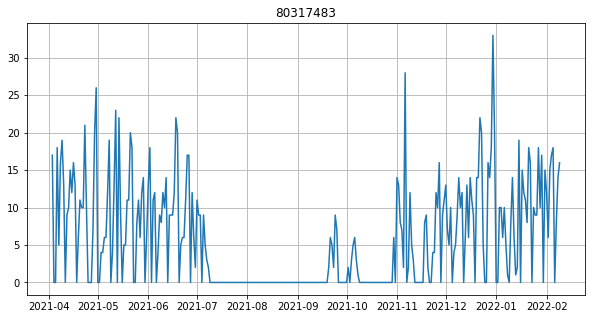

In [208]:
segment = "80317483"

df_drop_outliers = ts[:, segment, :]
ts_drop_outliers = TSDataset(df_drop_outliers, freq="D")
ts_drop_outliers.plot()

Outliers imputation process consists of two steps:

*   Replace the outliers, detected by the specific method, with NaNs using the instance of the corresponding OutliersTransform
*   Impute NaNs using the TimeSeriesImputerTransform



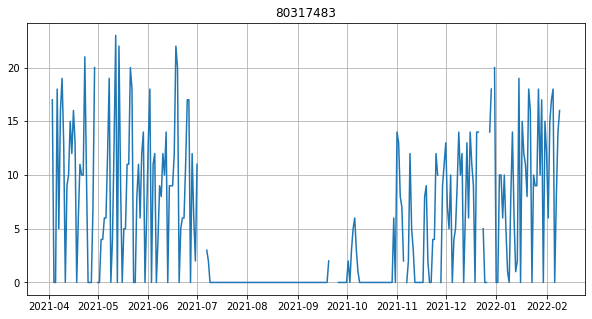

In [209]:
# Impute outliers with NaNs
outliers_remover = MedianOutliersTransform(in_column="target", **best_params)

ts_drop_outliers.fit_transform([outliers_remover])
ts_drop_outliers.plot()

Let's impute outliers detected by median method using the running_mean imputation strategy.

In [210]:
# Impute NaNs using the specified strategy
outliers_imputer = TimeSeriesImputerTransform(in_column="target", strategy="running_mean", window=30)

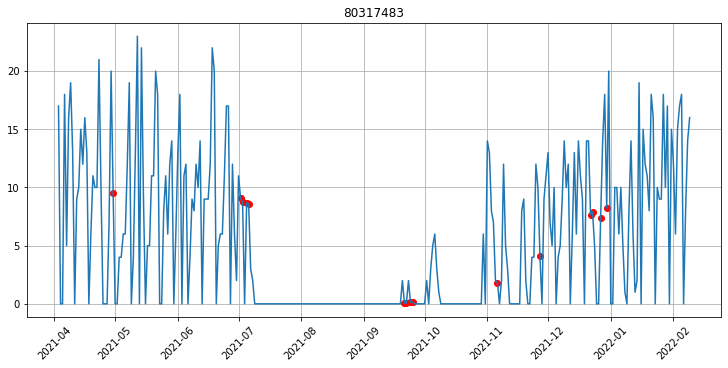

In [211]:
plot_imputation(imputer=outliers_imputer, ts=ts_drop_outliers)

In [212]:
ts_drop_outliers.fit_transform([outliers_imputer])

In [213]:
from etna.models import MovingAverageModel
from etna.pipeline import Pipeline
from etna.metrics import MAE, MSE, SMAPE

In [219]:
def get_metrics(forecast, test):
    """Compute the metrics on forecast"""
    metrics = {"MAE": MAE(), "MSE": MSE(), "SMAPE": SMAPE()}
    results = dict()
    for name, metric in metrics.items():
        results[name] = metric(y_true=test, y_pred=forecast)[segment]
    return results

In [220]:
def test_transforms(transforms=[]):
    """Run the experiment on the list of transforms"""
    # classic_df = pd.read_csv("data/example_dataset.csv")
    # df = TSDataset.to_dataset(classic_df[classic_df["segment"] == segment])
    # ts = TSDataset(df, freq="D")
    # train, test = ts.train_test_split(
    #     train_start="2019-05-20",
    #     train_end="2019-07-10",
    #     test_start="2019-07-11",
    #     test_end="2019-08-09",
    # )
    HORIZON = 14

    train, test = ts.train_test_split(test_size=HORIZON)

    model = Pipeline(model=MovingAverageModel(window=HORIZON), transforms=transforms, horizon=HORIZON)
    model.fit(train)
    forecast = model.forecast()
    metrics = get_metrics(forecast, test)
    return metrics

In [221]:
test_transforms()

/usr/local/lib/python3.8/dist-packages/etna/models/seasonal_ma.py:58: UserWarning: _SeasonalMovingAverageModel does not work with any exogenous series or features. It uses only target series for predict/
 
  warnings.warn(


{'MAE': 5.507289575523287,
 'MSE': 38.57879611203707,
 'SMAPE': 62.08224353694586}

In [222]:
transforms = [outliers_remover, outliers_imputer]
test_transforms(transforms)

/usr/local/lib/python3.8/dist-packages/etna/models/seasonal_ma.py:58: UserWarning: _SeasonalMovingAverageModel does not work with any exogenous series or features. It uses only target series for predict/
 
  warnings.warn(


{'MAE': 5.507289575523287,
 'MSE': 38.57879611203707,
 'SMAPE': 62.08224353694586}

Then we should choose another best_params and try one more time. Or it's also possible to automate this parameter tuning with Optuna, Hyperopt, etc.

# Validation

But what is more important - is to build proper validation. For Time Series it's Time Series K Fold validation, which is basically sliding window.

I don't have time to implement this properly now, but would definitly use it for this case